In [ ]:
#-*- coding: utf-8 -*-

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [ ]:
# seed 값 설정 
seed = 42
np.random.seed(seed)
tf.random.set_seed(42)

In [ ]:
# MNIST 데이터 불러오기 (train,test set 분리)
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


25개 샘플 이미지 display 해주는 함수 정의 

In [ ]:
def show_sample(images, labels, sample_count=25):
  # Create a square with can fit {sample_count} images
  grid_count = math.ceil(math.ceil(math.sqrt(sample_count)))
  grid_count = min(grid_count, len(images), len(labels))
  
  plt.figure(figsize=(2*grid_count, 2*grid_count))
  for i in range(sample_count):
    plt.subplot(grid_count, grid_count, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.gray)
    plt.xlabel(labels[i])
  plt.show()

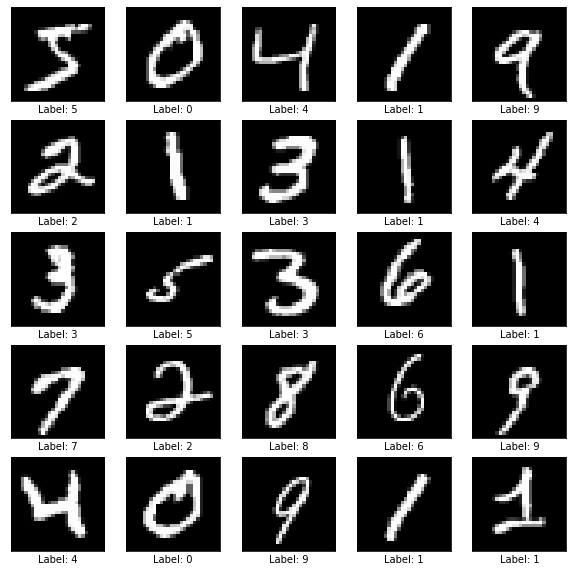

In [ ]:
show_sample(X_train, ['Label: %s' % label for label in Y_train])

특정한 숫자(Digit) 만 25개 display 해 주는 함수 

In [ ]:
def show_sample_digit(images, labels, digit, sample_count=25):
  # Create a square with can fit {sample_count} images
  grid_count = math.ceil(math.ceil(math.sqrt(sample_count)))
  grid_count = min(grid_count, len(images), len(labels))

  plt.figure(figsize=(2*grid_count, 2*grid_count))
  i = 0 
  digit_count = 0 
  while digit_count < sample_count: 
      i += 1
      if(digit == labels[i]):
        plt.subplot(grid_count, grid_count, digit_count+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.xlabel(labels[i])
        digit_count += 1
  plt.show()

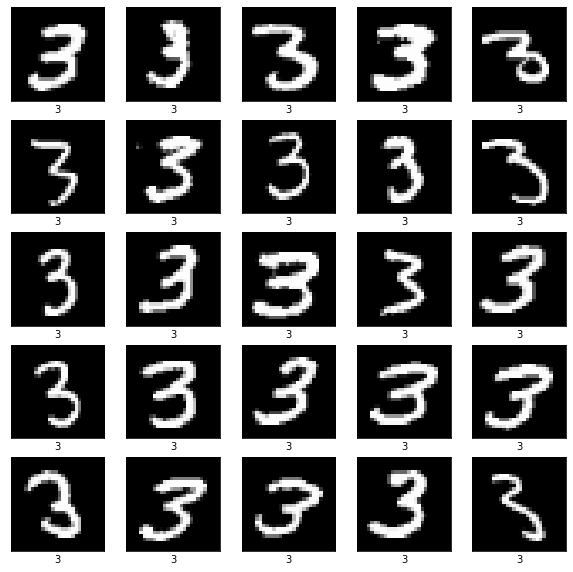

In [ ]:
# training dataset에서 특정한 숫자(Digit)만 25개 Display 해 줍니다. 
show_sample_digit(X_train, Y_train, 3)

In [ ]:
# 정규화 
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
# 28, 28, 1 : 28*28, 1 channel(흑백), 3 channels (컬러: rgb)
# astype('float32'): 정규화 위해 실수형으로 타입 변경 
# 255 나눈 이유 : 0~1 사이로 스케일링 

In [ ]:
# 바이너리화 (one-hot encoding)
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)
# np 제공하는 to_categorical : one-hot encoding 

In [ ]:
# 모델 생성(프레임 설정) , 컨볼루션 신경망(CNN)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape = (28, 28, 1), activation='relu'))
# 32 : mask 개수, kernel_size=(3,3) : kernel(윈도우) 필터 3*3 사용, input_shape 사용에 유의  
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# maxpooling 가장 큰 특징값(max) 추출(특성정보), pool_size = 2: 크기로 1/2 로 줄임 
model.add(Dropout(0.25))
# dropout : 은닉층의 연결층을 무작위(random)로 끊는다 >> 과적합 방지 
model.add(Flatten())
# flatten() : 1차원 차원 축소 (2차원 >> 1차원)
model.add(Dense(128,  activation='relu'))
model.add(Dense(10, activation = 'softmax')) 
# 출력결과가 10개 분류(0~9), 다중분류 : softmax 


In [ ]:
# 모델실행 환경설정 
model.compile(loss = 'categorical_crossentropy',  # loss : cost function : 범주형 크로스엔트로피
              optimizer = 'adam',                 # 최적화함수 : adam
              metrics=['accuracy'])               # 측정지표 : 정확도 

In [ ]:
# 모델 최적화 설정 
MODEL_DIR = './model/' # 모델 디렉토리 생성(폴더)
if not os.path.exists(MODEL_DIR):  # 모델 디렉토리에 폴더가 없다면, 
    os.mkdir(MODEL_DIR)            # 만들어 주세요(mkdir : make a directory)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"  # 모델 저장 경로 생성 
checkpointer = ModelCheckpoint(filepath = modelpath, monitor ='val_loss',
                               verbose=1, save_best_only=True)     
# val_loss 를 monitoring 주시함. verbose: 결과 상황판, 성능이 나아진 것만 보기 
early_stopping_callback = EarlyStopping(monitor ='val_loss', patience = 10 )
# val_loss 를 monitoring 주시함. 성능이 x 이상 돌려서 나아지지 않으면 그만 둬(조기종료)

In [ ]:
# 모델실행 (학습 : 훈련용 데이터 셋으로 하세요)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                    epochs=30, batch_size=200, verbose=1,
                    callbacks=[early_stopping_callback, checkpointer])

# 모델 학습 : fit , 훈련용 데이터로 함 
# 검증 데이터(validation_data : 테스트 데이터 사용)
# epochs : 반복횟수, batch_size : 샘플 200개 추출,  verbose: 훈련상황 보여줌 
# callbacks : 조기종료, 성능개선 여부 확인 

Epoch 1/30
299/300 [============================>.] - ETA: 0s - loss: 0.1919 - accuracy: 0.9431
Epoch 1: val_loss improved from inf to 0.05639, saving model to ./model/01-0.0564.hdf5
300/300 [==============================] - 17s 24ms/step - loss: 0.1913 - accuracy: 0.9433 - val_loss: 0.0564 - val_accuracy: 0.9809
Epoch 2/30
298/300 [============================>.] - ETA: 0s - loss: 0.0524 - accuracy: 0.9837
Epoch 2: val_loss improved from 0.05639 to 0.03949, saving model to ./model/02-0.0395.hdf5
300/300 [==============================] - 8s 25ms/step - loss: 0.0525 - accuracy: 0.9837 - val_loss: 0.0395 - val_accuracy: 0.9857
Epoch 3/30
299/300 [============================>.] - ETA: 0s - loss: 0.0352 - accuracy: 0.9886
Epoch 3: val_loss improved from 0.03949 to 0.03120, saving model to ./model/03-0.0312.hdf5
300/300 [==============================] - 8s 26ms/step - loss: 0.0351 - accuracy: 0.9886 - val_loss: 0.0312 - val_accuracy: 0.9886
Epoch 4/30
299/300 [==========================

In [ ]:
# 테스트 정확도 출력 
print('\n Test Accuracy: %.4f'%(model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 3s 7ms/step - loss: 0.0393 - accuracy: 0.9915

 Test Accuracy: 0.9915


In [ ]:
model.evaluate(X_test, Y_test)[0]

313/313 [==============================] - 2s 6ms/step - loss: 0.0393 - accuracy: 0.9915


0.03928828611969948

In [ ]:
model.evaluate(X_test, Y_test)[1]

313/313 [==============================] - 2s 7ms/step - loss: 0.0393 - accuracy: 0.9915


0.9915000200271606

In [ ]:
# 테스트 셋의 오차 
y_vloss = history.history['val_loss']

In [ ]:
# 학습용 셋의 오차 
y_loss = history.history['loss']

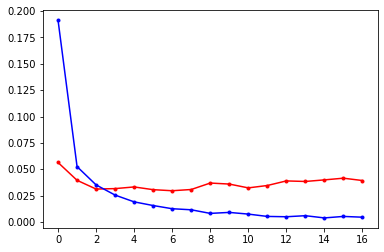

In [ ]:
# 그래프로 표현 
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker= '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker= '.', c = 'blue', label = 'Trainset_loss')

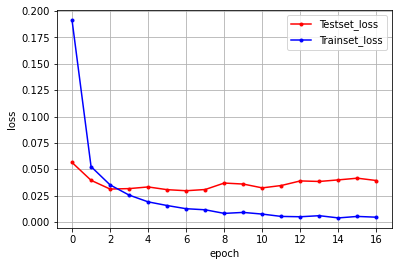

In [ ]:
# 그래프로 표현 
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker= '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker= '.', c = 'blue', label = 'Trainset_loss')

# 격자무늬 추가, 레이블 표시 
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
prediction = model.predict(X_test)
prediction 

array([[1.48417062e-14, 3.13832314e-14, 3.91149380e-13, ...,
        1.00000000e+00, 2.60451692e-18, 1.04852345e-14],
       [6.88163278e-15, 1.54265609e-12, 1.00000000e+00, ...,
        2.47174492e-19, 8.88924799e-20, 8.34793178e-21],
       [8.83552231e-10, 1.00000000e+00, 6.01908523e-11, ...,
        7.99413247e-09, 2.24651209e-09, 1.54958240e-13],
       ...,
       [2.93375962e-18, 3.96118796e-17, 1.29233312e-18, ...,
        2.13536884e-13, 2.08891626e-10, 5.10482767e-10],
       [1.11937710e-18, 4.19984865e-20, 1.98807997e-20, ...,
        7.62065342e-20, 2.98736834e-11, 7.83672205e-19],
       [1.07444478e-15, 2.52111920e-20, 2.11451420e-15, ...,
        8.48095192e-27, 1.73992267e-15, 7.90634658e-21]], dtype=float32)

In [ ]:
prediction.shape, prediction.dtype

((10000, 10), dtype('float32'))

In [ ]:
# 예측 결과 중에서 특정한 숫자(digit)의 이미지와 예측한 label 을 Display 합니다.
selected_digit = 0

result = prediction[selected_digit]
result_number = np.argmax(result)
print('Number is %2i' % (result_number))

Number is  7
